<a href="https://colab.research.google.com/github/pbcquoc/vietocr/blob/master/vietocr_gettingstart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Introduction
<p align="center">
<img src="https://raw.githubusercontent.com/pbcquoc/vietocr/master/image/vietocr.jpg" width="512" height="512">
</p>
This notebook describe how you can use VietOcr to train OCR model




In [1]:
! pip install -- vietocr

# Inference

In [4]:
import matplotlib.pyplot as plt
from PIL import Image

from vietocr.tool.predictor import Predictor
from vietocr.tool.config import Cfg

In [5]:
config = Cfg.load_config_from_name('vgg_transformer')

In [6]:
import sys
print(sys.version)


3.8.20 (default, Oct  3 2024, 10:22:23) 
[Clang 14.0.6 ]


Change weights to your weights or using default weights from our pretrained model. Path can be url or local file

In [16]:
# config['weights'] = './weights/transformerocr.pth'
config['cnn']['pretrained']=False
config['device'] = 'cpu'

In [17]:
detector = Predictor(config)

Model weight /var/folders/s_/qqll1tmd13j8cddntwdrs8bh0000gn/T/vgg_transformer.pth exsits. Ignore download!


/Users/mhnguyetvu/miniconda3/envs/vietocr_env/lib/python3.8/site-packages/vietocr/tool/predictor.py:20: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(t

In [10]:
! wget https://vocr.vn/data/vietocr/sample.zip
! unzip  -qq -o sample.zip

--2025-10-07 15:44:09--  https://vocr.vn/data/vietocr/sample.zip
Resolving vocr.vn (vocr.vn)... 128.199.222.116
Connecting to vocr.vn (vocr.vn)|128.199.222.116|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 305969 (299K) [application/zip]
Saving to: ‘sample.zip.4’

sample.zip.4        100%[===================>] 298.80K   579KB/s    in 0.5s    

2025-10-07 15:44:09 (579 KB/s) - ‘sample.zip.4’ saved [305969/305969]



In [9]:
import os, random
files = os.listdir('sample')
print('\n'.join(random.sample(files, 5)))

deskewed-2019_09_27_051567_201909271650027_68.jpg
030068003051.jpeg
97652.jpg
deskewed-2019_08_28_tran_thi_thanh_2019082813444611_9.jpg
2019_10_05_phung_vu_minh_phong_201910051031556_8.jpg


'VŨ THUỲ NINH'

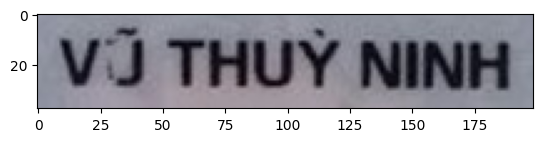

In [10]:
img = './sample/031189003299.jpeg'
img = Image.open(img)
plt.imshow(img)
s = detector.predict(img)
s

# Download sample dataset

In [11]:
! wget https://vocr.vn/data/vietocr/data_line.zip

--2025-10-07 15:04:46--  https://vocr.vn/data/vietocr/data_line.zip
Resolving vocr.vn (vocr.vn)... 128.199.222.116
Connecting to vocr.vn (vocr.vn)|128.199.222.116|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61212284 (58M) [application/zip]
Saving to: ‘data_line.zip.3’

data_line.zip.3     100%[===================>]  58.38M   670KB/s    in 2m 17s  

2025-10-07 15:07:03 (437 KB/s) - ‘data_line.zip.3’ saved [61212284/61212284]



In [11]:
! unzip -qq -o ./data_line.zip

# Train model



1.   Load your config
2.   Train model using your dataset above



Load the default config, we adopt VGG for image feature extraction

In [9]:
from vietocr.tool.config import Cfg
from vietocr.model.trainer import Trainer

# Change the config 

* *data_root*: the folder save your all images
* *train_annotation*: path to train annotation
* *valid_annotation*: path to valid annotation
* *print_every*: show train loss at every n steps
* *valid_every*: show validation loss at every n steps
* *iters*: number of iteration to train your model
* *export*: export weights to folder that you can use for inference
* *metrics*: number of sample in validation annotation you use for computing full_sequence_accuracy, for large dataset it will take too long, then you can reuduce this number


In [ ]:
# config = Cfg.load_config_from_name('vgg_transformer')

In [13]:

dataset_params = {
    'name':'hw',
    'data_root':'./data_line/',
    'train_annotation':'train_line_annotation.txt',
    'valid_annotation':'test_line_annotation.txt'
}

params = {
         'print_every':200,
         'valid_every':15*200,
          'iters':20000,
          'checkpoint':'./checkpoint/transformerocr_checkpoint.pth',    
          'export':'./weights/transformerocr.pth',
          'metrics': 10000
         }

config['trainer'].update(params)
config['dataset'].update(dataset_params)
config['device'] = 'cuda:0'

you can change any of these params in this full list below

In [14]:
config

{'vocab': 'aAàÀảẢãÃáÁạẠăĂằẰẳẲẵẴắẮặẶâÂầẦẩẨẫẪấẤậẬbBcCdDđĐeEèÈẻẺẽẼéÉẹẸêÊềỀểỂễỄếẾệỆfFgGhHiIìÌỉỈĩĨíÍịỊjJkKlLmMnNoOòÒỏỎõÕóÓọỌôÔồỒổỔỗỖốỐộỘơƠờỜởỞỡỠớỚợỢpPqQrRsStTuUùÙủỦũŨúÚụỤưƯừỪửỬữỮứỨựỰvVwWxXyYỳỲỷỶỹỸýÝỵỴzZ0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~ ',
 'device': 'cuda:0',
 'seq_modeling': 'transformer',
 'transformer': {'d_model': 256,
  'nhead': 8,
  'num_encoder_layers': 6,
  'num_decoder_layers': 6,
  'dim_feedforward': 2048,
  'max_seq_length': 1024,
  'pos_dropout': 0.1,
  'trans_dropout': 0.1},
 'optimizer': {'max_lr': 0.0003, 'pct_start': 0.1},
 'trainer': {'batch_size': 32,
  'print_every': 200,
  'valid_every': 3000,
  'iters': 20000,
  'export': './weights/transformerocr.pth',
  'checkpoint': './checkpoint/transformerocr_checkpoint.pth',
  'log': './train.log',
  'metrics': 10000},
 'dataset': {'name': 'hw',
  'data_root': './data_line/',
  'train_annotation': 'train_line_annotation.txt',
  'valid_annotation': 'test_line_annotation.txt',
  'image_height': 32,
  'image_min_width': 32

You should train model from our pretrained 

In [32]:
# Reload Trainer class if you have edited the source code
import importlib
import vietocr.model.trainer
importlib.reload(vietocr.model.trainer)
from vietocr.model.trainer import Trainer

Save model configuration for inference, load_config_from_file

In [ ]:
# trainer.config.save('config.yml')

Visualize your dataset to check data augmentation is appropriate

In [43]:
from vietocr.tool.config import Cfg
config = Cfg.load_config_from_file('config.yml')

In [44]:
print(config['dataloader'])


{'num_workers': 0, 'pin_memory': True}


In [45]:
trainer = Trainer(config, pretrained=True)

Model weight /var/folders/s_/qqll1tmd13j8cddntwdrs8bh0000gn/T/vgg_transformer.pth exsits. Ignore download!
train_hw exists. Remove folder if you want to create new dataset


train_hw build cluster: 100%|███████████████████████████████| 5482/5482 [00:00<00:00, 270021.90it/s]

valid_hw exists. Remove folder if you want to create new dataset



valid_hw build cluster: 100%|███████████████████████████████| 1812/1812 [00:00<00:00, 240265.52it/s]



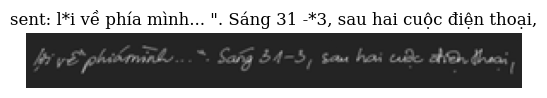

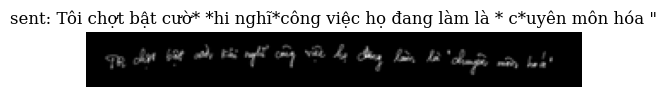

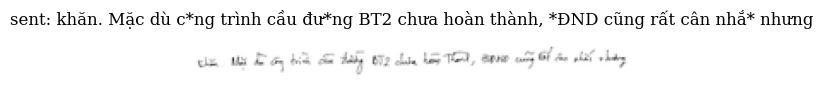

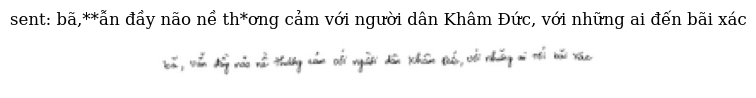

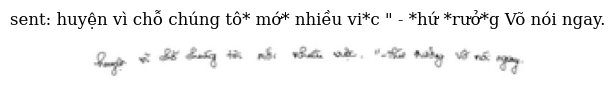

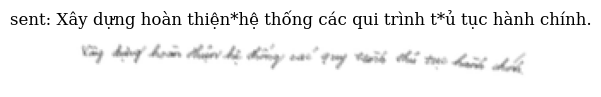

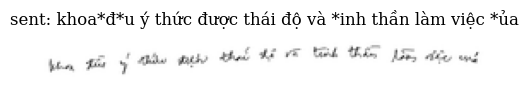

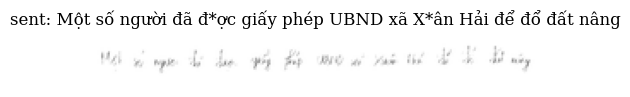

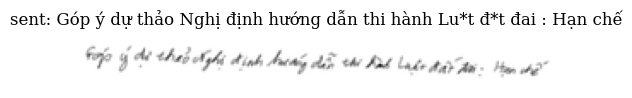

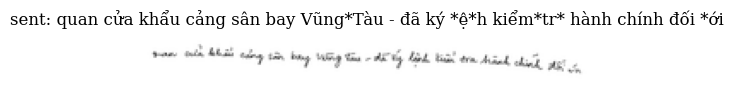

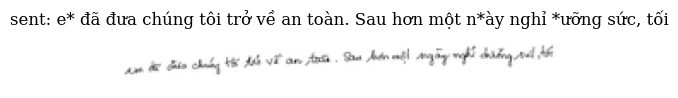

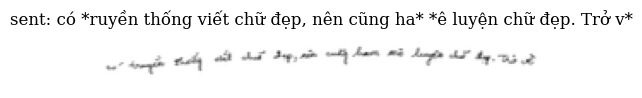

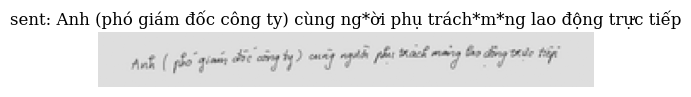

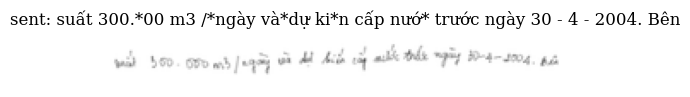

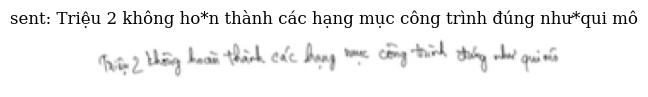

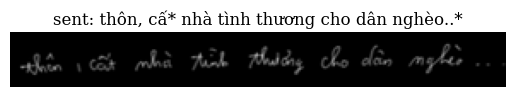

In [46]:
trainer.visualize_dataset()

Train now

In [ ]:
trainer.train()

iter: 000200 - train loss: 1.567 - lr: 1.91e-05 - load time: 14.10 - gpu time: 1595.23
iter: 000400 - train loss: 1.300 - lr: 3.95e-05 - load time: 12.97 - gpu time: 1587.14
iter: 000400 - train loss: 1.300 - lr: 3.95e-05 - load time: 12.97 - gpu time: 1587.14
iter: 000600 - train loss: 1.173 - lr: 7.14e-05 - load time: 13.70 - gpu time: 1643.33
iter: 000600 - train loss: 1.173 - lr: 7.14e-05 - load time: 13.70 - gpu time: 1643.33
iter: 000800 - train loss: 1.112 - lr: 1.12e-04 - load time: 13.37 - gpu time: 1599.05
iter: 000800 - train loss: 1.112 - lr: 1.12e-04 - load time: 13.37 - gpu time: 1599.05
iter: 001000 - train loss: 1.063 - lr: 1.56e-04 - load time: 12.99 - gpu time: 1636.43
iter: 001000 - train loss: 1.063 - lr: 1.56e-04 - load time: 12.99 - gpu time: 1636.43
iter: 001200 - train loss: 1.030 - lr: 2.01e-04 - load time: 13.49 - gpu time: 1549.61
iter: 001200 - train loss: 1.030 - lr: 2.01e-04 - load time: 13.49 - gpu time: 1549.61
iter: 001400 - train loss: 0.985 - lr: 2.41

Visualize prediction from our trained model


In [ ]:
trainer.visualize_prediction()

Compute full seq accuracy for full valid dataset

In [ ]:
trainer.precision()

## Predict new data


In [ ]:
img_path = '/Users/mhnguyetvu/workspace/OCR-handwrite/data/Appointment Form.jpg'  # Thay bằng đường dẫn ảnh của bạn
img = Image.open(img_path)
plt.imshow(img)
plt.axis('off')
plt.show()

result = detector.predict(img)
print("Kết quả nhận diện:", result)